In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
imdb = pd.read_csv('/content/drive/MyDrive/hyu/text/IMDBDataset.csv')

In [ ]:
imdb = imdb[:10000]

In [ ]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     10000 non-null  object
 1   sentiment  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [ ]:
imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
imdb.isnull().any()

review       False
sentiment    False
dtype: bool

In [ ]:
imdb['review'].nunique()

9983

In [ ]:
imdb['sentiment'].nunique()

2

In [ ]:
imdb.drop_duplicates(subset=['review'], inplace=True)

In [ ]:
imdb['sentiment']=imdb['sentiment'].replace(['positive','negative'],[0,1])

In [ ]:
imdb.shape

(9983, 3)

In [ ]:
imdb['sentiment'].value_counts()

0    5023
1    4960
Name: sentiment, dtype: int64

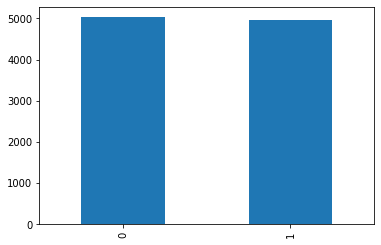

In [ ]:
imdb['sentiment'].value_counts().plot(kind='bar')

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [ ]:
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [ ]:
def preprocessing(text):
  #단어로 토큰화
  tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]

  #불용어제거
  stop = stopwords.words('english')
  tokens = [token for token in tokens if token not in stop]

  #단어 길이가 너무 짧으면 제거
  tokens = [word for word in tokens if len(word) >= 3]

  #소문자로 바꾸기
  tokens = [word.lower() for word in tokens]

  #표제어 추출
  lmtzr = WordNetLemmatizer()
  tokens = [lmtzr.lemmatize(word) for word in tokens]

  preprocessed_text = ' '.join(tokens)
  return preprocessed_text




In [ ]:
imdb['review_pre'] = imdb['review'].apply(lambda x: preprocessing(x))

In [ ]:
imdb.head()

,review,sentiment,review_pre
0,One of the other reviewers has mentioned that ...,0,one reviewer mentioned watching episode 'll ho...
1,A wonderful little production. <br /><br />The...,0,wonderful little production the filming techni...
2,I thought this was a wonderful way to spend ti...,0,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,1,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",0,petter mattei love time money visually stunnin...


In [ ]:
import numpy as np

In [ ]:
trainset_size = int(round(len(imdb)*0.7))
print(trainset_size)
x_train = np.array([el for el in imdb.iloc[:trainset_size,2]])
y_train = np.array([el for el in imdb.iloc[:trainset_size,1]])
x_test = np.array([el for el in imdb.iloc[trainset_size:,2]])
y_test = np.array([el for el in imdb.iloc[trainset_size:,1]])

6988


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=2, ngram_range=(1,2),\
    stop_words = 'english', strip_accents='unicode', norm='l2')
X_train = vectorizer.fit_transform(x_train)
X_test = vectorizer.transform(x_test)

In [ ]:
X_train

<6988x84351 sparse matrix of type '<class 'numpy.float64'>'
	with 803309 stored elements in Compressed Sparse Row format>

##나이브베이즈 분류

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf_NB = MultinomialNB().fit(X_train, y_train)
y_predicted_NB = clf_NB.predict(X_test)

In [ ]:
y_predicted_NB

array([0, 0, 0, ..., 1, 1, 0])

In [ ]:
y_test

array([0, 0, 0, ..., 1, 1, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print('\n confusion_matrix NB \n')
cm = confusion_matrix(y_test, y_predicted_NB)
print(cm)


 confusion_matrix NB 

[[1318  216]
 [ 194 1267]]


In [ ]:
print('\n Here is the classification report: ')
print(classification_report(y_test, y_predicted_NB))


 Here is the classification report: 
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1534
           1       0.85      0.87      0.86      1461

    accuracy                           0.86      2995
   macro avg       0.86      0.86      0.86      2995
weighted avg       0.86      0.86      0.86      2995



## 의사결정나무

In [ ]:
from sklearn import tree
clf_DT = tree.DecisionTreeClassifier().fit(X_train, y_train)
y_predicted_DT = clf_DT.predict(X_test)

In [ ]:
print('\n confusion_matrix DT \n')
cm = confusion_matrix(y_test, y_predicted_DT)
print(cm)
print('\n Here is the classification report: ')
print(classification_report(y_test, y_predicted_DT))


 confusion_matrix DT 

[[1083  451]
 [ 405 1056]]

 Here is the classification report: 
              precision    recall  f1-score   support

           0       0.73      0.71      0.72      1534
           1       0.70      0.72      0.71      1461

    accuracy                           0.71      2995
   macro avg       0.71      0.71      0.71      2995
weighted avg       0.71      0.71      0.71      2995



## SGDClassifier

In [ ]:
from sklearn.linear_model import SGDClassifier
clf_SGD = SGDClassifier(alpha=.0001).fit(X_train, y_train)
y_predicted_SGD = clf_SGD.predict(X_test)

In [ ]:
print (' \n confusion_matrix SGD \n ')
cm = confusion_matrix(y_test, y_predicted_SGD)
print (cm)
print ('\n Here is the classification report:')
print (classification_report(y_test, y_predicted_SGD))


 
 confusion_matrix SGD 
 
[[1369  165]
 [ 208 1253]]

 Here is the classification report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1534
           1       0.88      0.86      0.87      1461

    accuracy                           0.88      2995
   macro avg       0.88      0.88      0.88      2995
weighted avg       0.88      0.88      0.88      2995



## SVM Classifier

In [ ]:
from sklearn.svm import LinearSVC
clf_SVM = LinearSVC().fit(X_train, y_train)
y_predicted_SVM = clf_SVM.predict(X_test)

In [ ]:
print (' \n confusion_matrix SVM\n ')
cm = confusion_matrix(y_test, y_predicted_SVM)
print (cm)
print ('\n Here is the classification report:')
print (classification_report(y_test, y_predicted_SVM))

 
 confusion_matrix SVM
 
[[1376  158]
 [ 212 1249]]

 Here is the classification report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      1534
           1       0.89      0.85      0.87      1461

    accuracy                           0.88      2995
   macro avg       0.88      0.88      0.88      2995
weighted avg       0.88      0.88      0.88      2995



## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_RFA = RandomForestClassifier(n_estimators=10)
clf_RFA.fit(X_train, y_train)
y_predicted_RFA = clf_RFA.predict(X_test)

In [ ]:
print (' \n confusion_matrix RFA \n ')
cm = confusion_matrix(y_test, y_predicted_RFA)
print (cm)
print ('\n Here is the classification report:')
print (classification_report(y_test, y_predicted_RFA))


 
 confusion_matrix RFA 
 
[[1275  259]
 [ 448 1013]]

 Here is the classification report:
              precision    recall  f1-score   support

           0       0.74      0.83      0.78      1534
           1       0.80      0.69      0.74      1461

    accuracy                           0.76      2995
   macro avg       0.77      0.76      0.76      2995
weighted avg       0.77      0.76      0.76      2995

